# Sentiment Analysis

Download the Foursquare annotated comments in Brazilian Portuguese: https://www.kaggle.com/thaisalmeida/tips-foursquare/version/1

Place the files in subfolder 'docs/'

If using colab, upload file `tips_scenario1_train.csv` using colab file upload.

In [1]:
useColab=False
if useColab:
    #!wget files if using Google Colab
    !wget -q https://raw.githubusercontent.com/douglas125/TextClassification/master/preProcessing.py
    !wget -q https://raw.githubusercontent.com/douglas125/TextClassification/master/Embeddings.py
    !wget -q https://raw.githubusercontent.com/douglas125/TextClassification/master/textModels.py
    !wget -q https://raw.githubusercontent.com/douglas125/TextClassification/master/requirements.txt
    !pip install keras --upgrade #need this - bug fix
    !pip install -r requirements.txt


    #move CSVs to docs/ folder
    from google.colab import files
    files.upload()

    !mkdir docs
    !mv *.csv docs/
    !ls

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import preProcessing

from sklearn.model_selection import RandomizedSearchCV
pd.set_option('max_colwidth',150)

In [3]:
df = pd.read_csv('docs/tips_scenario1_train.csv')
df.head(16)

,texto,rotulo
0,"A comida é deliciosa, mas pedi limonada suiça e me disseram que hoje estavam todos muito ocupados e que ninguém conseguiria me atender....melhor i...",-1.0
1,"A partir desta sexta feira dia 11 começam a abrir para jantar mas corre pois é só até as 22 hrs e no domingo dia das mães, estarão aberto durante ...",0.0
2,Joint burguer e brewdog,0.0
3,Agora de segunda a sexta o Habanero vai abrir no almoço com pratos mexicanos e tradicionais!,0.0
4,"Experimente o drink ""Dona Diabla"". Muito bom!",1.0
5,Nova senha do Wifi: 1129508219,0.0
6,Wi-fi 1129508219,0.0
7,"Adoramos a pizza carbonara e a paulistana. Não surpreendeu tanto, mas vale a pena por resgatar o tradicionalismo. Dica @Gourmet_For",1.0
8,"O diferencial desse Burger King é que você mesmo serve o refrigerante, e a vontade!",1.0
9,Unico defeito estacionamento pago!,-1.0


In [4]:
preProcessing.clean_text('Este é um teste de 354 números! Mas que: "interessante".')

'este é um teste de 000 números ! mas que : interessante .'

In [5]:
preProcessing.splitWithPunctuation('mas que: "legal"')

['mas', 'que', ':', '"', 'legal', '"']

In [6]:
df.shape

(1714, 2)

# Baseline: Bag of words

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import numpy as np
df = df.fillna(0)

In [8]:
texts = df['texto'].astype(str).tolist()
categs = df['rotulo'].tolist()
texts = [preProcessing.clean_text(t) for t in texts]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(texts, categs, test_size=0.1, random_state=42)

In [10]:
countVec = CountVectorizer(max_features=4700, lowercase=False, strip_accents='unicode')
vectTexts_train = countVec.fit_transform(X_train)
vectTexts_test = countVec.transform(X_test)

In [11]:
countVec.vocabulary_

{'achei': 72,
 'comida': 960,
 'bem': 498,
 'mediocre': 2670,
 'prato': 3380,
 'com': 929,
 'muitas': 2845,
 'coisas': 915,
 'mas': 2647,
 'nada': 2878,
 'sabor': 3782,
 'nao': 2885,
 'vale': 4367,
 'que': 3523,
 'custa': 1173,
 'picburguer': 3272,
 'americano': 220,
 'sempre': 3883,
 'muito': 2847,
 'caro': 720,
 'pelo': 3191,
 'tamanho': 4121,
 'fomos': 1889,
 'em': 1476,
 'dois': 1416,
 'gastamos': 2006,
 '00': 0,
 'para': 3105,
 'fast': 1781,
 'food': 1891,
 'de': 1190,
 'normal': 2941,
 'foi': 1879,
 'ojo': 2993,
 'del': 1231,
 'bifefantastico': 515,
 'torta': 4263,
 'bacalhau': 406,
 'maravilhosa': 2628,
 'saladona': 3811,
 'opcao': 3017,
 'por': 3340,
 'reais': 3588,
 'no': 2930,
 'almoco': 190,
 'servico': 3927,
 'gentil': 2030,
 'unico': 4352,
 'problema': 3446,
 'demora': 1253,
 'desnecessario': 1302,
 'colocar': 926,
 'todos': 4235,
 'os': 3039,
 'funcionarios': 1974,
 'trabalhar': 4276,
 'dia': 1336,
 'deveriam': 1329,
 'ter': 4176,
 'dado': 1176,
 'folga': 1881,
 'pois': 3

In [12]:
np.argmax(countVec.transform(['experimente', 'achei', 'caro']), axis=1)

matrix([[1723],
        [  72],
        [ 720]])

In [13]:
vectTexts_train

<1542x4551 sparse matrix of type '<class 'numpy.int64'>'
	with 25320 stored elements in Compressed Sparse Row format>

In [14]:
mnb = MultinomialNB()
mnb.fit(vectTexts_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
mnb.score(vectTexts_train, y_train)

0.9111543450064851

In [16]:
mnb.score(vectTexts_test, y_test)

0.7790697674418605

In [17]:
mnbParams = { #'verbose' : [1],
             'alpha':[0.001, 0.1,1,10, 100],  
             'fit_prior' :[True, False]}
mnbRSCV = RandomizedSearchCV(mnb, mnbParams, verbose=1, return_train_score=True) #, n_jobs=-1)
mnbRSCV.fit(vectTexts_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'alpha': [0.001, 0.1, 1, 10, 100], 'fit_prior': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=1)

In [18]:
pd.DataFrame(mnbRSCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_prior,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.006664,4.709208e-04,0.001333,0.000471,True,0.001,"{'fit_prior': True, 'alpha': 0.001}",0.753398,0.776699,0.757812,0.762646,0.010113,3,0.988315,0.986368,0.990291,0.988325,0.001602
1,0.002666,4.710333e-04,0.000667,0.000471,False,0.001,"{'fit_prior': False, 'alpha': 0.001}",0.745631,0.761165,0.757812,0.754864,0.006680,4,0.988315,0.984421,0.988350,0.987029,0.001844
2,0.002332,4.713704e-04,0.000666,0.000471,True,0.1,"{'fit_prior': True, 'alpha': 0.1}",0.745631,0.763107,0.703125,0.737354,0.025167,5,0.979552,0.980526,0.986408,0.982162,0.003028
3,0.002666,4.712580e-04,0.000000,0.000000,False,0.1,"{'fit_prior': False, 'alpha': 0.1}",0.702913,0.714563,0.664062,0.693904,0.021572,7,0.981500,0.976631,0.980583,0.979571,0.002112
4,0.001999,1.123916e-07,0.000000,0.000000,True,1,"{'fit_prior': True, 'alpha': 1}",0.800000,0.800000,0.791016,0.797017,0.004231,1,0.914314,0.906524,0.909709,0.910182,0.003198
5,0.001999,4.052337e-07,0.000667,0.000471,False,1,"{'fit_prior': False, 'alpha': 1}",0.782524,0.800000,0.771484,0.784695,0.011737,2,0.929893,0.927945,0.930097,0.929312,0.000970
6,0.001999,1.123916e-07,0.000000,0.000000,True,10,"{'fit_prior': True, 'alpha': 10}",0.689320,0.687379,0.693359,0.690013,0.002489,8,0.704966,0.697176,0.692233,0.698125,0.005241
7,0.002000,2.247832e-07,0.000666,0.000471,False,10,"{'fit_prior': False, 'alpha': 10}",0.702913,0.706796,0.714844,0.708171,0.004965,6,0.740019,0.724440,0.722330,0.728930,0.007889
8,0.002000,4.052337e-07,0.000333,0.000471,True,100,"{'fit_prior': True, 'alpha': 100}",0.681553,0.681553,0.683594,0.682231,0.000961,10,0.682571,0.682571,0.681553,0.682232,0.000480
9,0.001999,1.123916e-07,0.000000,0.000000,False,100,"{'fit_prior': False, 'alpha': 100}",0.685437,0.685437,0.689453,0.686770,0.001891,9,0.697176,0.688413,0.689320,0.691636,0.003935


In [19]:
mnbRSCV.best_estimator_.score(vectTexts_test, y_test)

0.7790697674418605

# Word Embedding Class

In [20]:
from Embeddings import WordEmbeddingBR, splitWithPunctuation
import numpy as np

C:\Users\Douglas\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [21]:
WordEmbeddingBR.downloadNILCEmbeddings()
WordEmbeddingBR.getAvailableEmbeddings()

glove50 exists. Skipping.
cbow50_wang2vec exists. Skipping.
cbow50_fasttext exists. Skipping.
skip50_word2vec exists. Skipping.
Done!


['cbow50_fasttext',
 'cbow50_wang2vec',
 'glove1000',
 'glove50',
 'skip50_word2vec',
 'skip_s300_word2vec',
 'wang2vec_skip600']

In [22]:
wee = WordEmbeddingBR('skip_s300_word2vec')
#wee = WordEmbeddingBR('cbow50_wang2vec')

Reading embedding file: skip_s300_word2vec.zip


934967it [02:45, 5644.25it/s]


In [23]:
classifiers = wee.TrainBaselineClassifiers(X_train, y_train, n_iter=8)

Fitting Support Vector Machine...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   36.0s finished


[LibSVM]Fitting Gradient Boosted Tree...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
      Iter       Train Loss   Remaining Time 
         1         672.9555            9.69s
         2         528.8507            9.79s
         3         429.4743            9.60s
         4         351.1479            9.48s
         5         298.2195            9.35s
         6         261.9145            9.26s
         7         219.0323            9.19s
         8         188.0648            9.10s
         9         163.1293            8.99s
        10         141.5006            8.92s
        20          53.9693            7.66s
        30          22.7885            6.60s
        40           9.5566            5.65s
        50           4.1021            4.74s
        60           1.9414            3.83s
        70           0.8551            2.93s
        80           0.3763            2.03s
        90           0.2836            1.07s
       100           0.2836            0.22

        50           2.9979           25.50s
        60           2.9599           21.81s
        70           2.9207           19.13s
        80           2.8925           16.92s
        90           2.8761           14.96s
       100           2.8561           13.39s
       200           2.7838            3.28s
      Iter       Train Loss   Remaining Time 
         1         578.1143           35.15s
         2         376.4880           36.46s
         3         255.0910           36.91s
         4         169.2446           37.48s
         5         119.3086           37.51s
         6          82.4307           37.73s
         7          61.0613           37.48s
         8          44.7062           37.45s
         9          30.8309           37.30s
        10          22.6558           37.16s
        20           1.2472           33.93s
        30           0.2911           26.55s
        40           0.2854           18.56s
        50           0.2854           13.68s
        6

         1         544.2916            1.34m
         2         336.3532            1.38m
         3         223.4468            1.43m
         4         144.1088            1.45m
         5         100.5334            1.45m
         6          71.0411            1.44m
         7          50.4924            1.43m
         8          34.9979            1.43m
         9          27.1845            1.42m
        10          19.8686            1.42m
        20           4.1408            1.33m
        30           3.0621            1.15m
        40           3.0045           54.75s
        50           2.9631           45.59s
        60           2.9221           39.84s
        70           2.8908           35.42s
        80           2.8732           31.61s
        90           2.8563           28.82s
       100           2.8381           26.54s
       200           2.7781           13.07s
       300           2.7731            4.43s
      Iter       Train Loss   Remaining Time 
         

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  6.0min finished


      Iter       Train Loss   Remaining Time 
         1        1057.0097           16.42s
         2         840.5998           15.65s
         3         691.8175           15.44s
         4         590.2313           15.15s
         5         505.7807           15.01s
         6         460.1419           14.63s
         7         397.7170           14.40s
         8         354.3250           14.23s
         9         327.0571           13.92s
        10         300.4983           13.94s
        20         137.2109           12.52s
        30          70.2353           11.16s
        40          39.7625            9.56s
        50          24.0879            7.95s
        60          16.3988            6.41s
        70          11.5265            4.93s
        80           8.6613            3.41s
        90           6.9705            1.92s
       100           6.1489            0.44s


In [24]:
wee.TestBaselineClassifiers(X_train, y_train, classifiers)

{'SVM': 0.9980544747081712, 'GradientBoostingClassifier': 0.9980544747081712}

In [25]:
wee.TestBaselineClassifiers(X_test, y_test, classifiers)

{'SVM': 0.7848837209302325, 'GradientBoostingClassifier': 0.7034883720930233}

# RNN

Base: Bidirectional Attention Flow for Machine Comprehension https://arxiv.org/abs/1611.01603

TODO: Write data generator, model compatible with scikit-learn RandomSearchCV

Inputs to the model:

- Integer codes of each word
- Integer codes of each character of each word
- Pretrained embeddings for each word

## Step 1: Encode characters

For the character embedding layer, we will use all available characters plus the [PAD] character.

In [26]:
import textModels

C:\Users\Douglas\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [27]:
#bdam = textModels.BiDirAttModelClassifier(3, charEmbSize=4, wordEmbSize=4, preTrainedEmbeddings=wee, nHeads=1)
#bdam = textModels.BiDirAttModelClassifier(3, charEmbSize=8, wordEmbSize=64, preTrainedEmbeddings=None, nHeads=1)
bdam = textModels.BiDirAttModelClassifier(3, charEmbSize=16, wordEmbSize=64, preTrainedEmbeddings=wee, nHeads=1)
#bdam = textModels.BiDirAttModelClassifier(3, charEmbSize=16, wordEmbSize=64, preTrainedEmbeddings=None, nHeads=1)

In [28]:
bdam.fit(X_train,y_train)

Maximum sentence length: 49. Maximum number of chars in a word: 46
Train on 1310 samples, validate on 232 samples
Epoch 1/100
Changing learning rate to 0.001
1310/1310 [==============================] - ETA: 53s - loss: 1.0986 - sparse_categorical_accuracy: 0.42 - ETA: 31s - loss: 1.0972 - sparse_categorical_accuracy: 0.55 - ETA: 22s - loss: 1.0955 - sparse_categorical_accuracy: 0.58 - ETA: 17s - loss: 1.0923 - sparse_categorical_accuracy: 0.61 - ETA: 13s - loss: 1.0871 - sparse_categorical_accuracy: 0.62 - ETA: 10s - loss: 1.0742 - sparse_categorical_accuracy: 0.64 - ETA: 7s - loss: 1.0580 - sparse_categorical_accuracy: 0.6629 - ETA: 5s - loss: 1.0409 - sparse_categorical_accuracy: 0.666 - ETA: 2s - loss: 1.0376 - sparse_categorical_accuracy: 0.658 - ETA: 0s - loss: 1.0177 - sparse_categorical_accuracy: 0.660 - 24s 18ms/step - loss: 1.0120 - sparse_categorical_accuracy: 0.6618 - val_loss: 0.8518 - val_sparse_categorical_accuracy: 0.6466

Epoch 00001: val_sparse_categorical_accuracy im


Epoch 00009: val_sparse_categorical_accuracy improved from 0.64655 to 0.69828, saving model to model-text.h5
Epoch 10/100
Changing learning rate to 0.0006
1310/1310 [==============================] - ETA: 17s - loss: 0.5032 - sparse_categorical_accuracy: 0.79 - ETA: 15s - loss: 0.5527 - sparse_categorical_accuracy: 0.74 - ETA: 13s - loss: 0.5490 - sparse_categorical_accuracy: 0.75 - ETA: 11s - loss: 0.5322 - sparse_categorical_accuracy: 0.76 - ETA: 9s - loss: 0.5062 - sparse_categorical_accuracy: 0.7859 - ETA: 8s - loss: 0.4988 - sparse_categorical_accuracy: 0.791 - ETA: 6s - loss: 0.4885 - sparse_categorical_accuracy: 0.795 - ETA: 4s - loss: 0.4905 - sparse_categorical_accuracy: 0.800 - ETA: 2s - loss: 0.4901 - sparse_categorical_accuracy: 0.802 - ETA: 0s - loss: 0.4851 - sparse_categorical_accuracy: 0.803 - 21s 16ms/step - loss: 0.4797 - sparse_categorical_accuracy: 0.8069 - val_loss: 1.0040 - val_sparse_categorical_accuracy: 0.6853

Epoch 00010: val_sparse_categorical_accuracy did 

1310/1310 [==============================] - ETA: 17s - loss: 0.0589 - sparse_categorical_accuracy: 0.98 - ETA: 15s - loss: 0.0613 - sparse_categorical_accuracy: 0.98 - ETA: 14s - loss: 0.0757 - sparse_categorical_accuracy: 0.97 - ETA: 12s - loss: 0.0693 - sparse_categorical_accuracy: 0.97 - ETA: 10s - loss: 0.0634 - sparse_categorical_accuracy: 0.97 - ETA: 8s - loss: 0.0661 - sparse_categorical_accuracy: 0.9766 - ETA: 6s - loss: 0.0657 - sparse_categorical_accuracy: 0.976 - ETA: 4s - loss: 0.0672 - sparse_categorical_accuracy: 0.977 - ETA: 2s - loss: 0.0640 - sparse_categorical_accuracy: 0.978 - ETA: 0s - loss: 0.0632 - sparse_categorical_accuracy: 0.978 - 21s 16ms/step - loss: 0.0660 - sparse_categorical_accuracy: 0.9771 - val_loss: 1.3627 - val_sparse_categorical_accuracy: 0.6724

Epoch 00018: val_sparse_categorical_accuracy did not improve from 0.72414
Epoch 19/100
Changing learning rate to 0.0006
1310/1310 [==============================] - ETA: 18s - loss: 0.0699 - sparse_categor


Epoch 00026: val_sparse_categorical_accuracy did not improve from 0.72845
Epoch 27/100
Changing learning rate to 0.00035999999999999997
1310/1310 [==============================] - ETA: 20s - loss: 0.0183 - sparse_categorical_accuracy: 0.99 - ETA: 17s - loss: 0.0126 - sparse_categorical_accuracy: 0.99 - ETA: 14s - loss: 0.0125 - sparse_categorical_accuracy: 0.99 - ETA: 12s - loss: 0.0125 - sparse_categorical_accuracy: 0.99 - ETA: 10s - loss: 0.0101 - sparse_categorical_accuracy: 0.99 - ETA: 8s - loss: 0.0120 - sparse_categorical_accuracy: 0.9974 - ETA: 6s - loss: 0.0116 - sparse_categorical_accuracy: 0.997 - ETA: 4s - loss: 0.0111 - sparse_categorical_accuracy: 0.998 - ETA: 2s - loss: 0.0111 - sparse_categorical_accuracy: 0.998 - ETA: 0s - loss: 0.0131 - sparse_categorical_accuracy: 0.997 - 22s 17ms/step - loss: 0.0129 - sparse_categorical_accuracy: 0.9977 - val_loss: 1.5959 - val_sparse_categorical_accuracy: 0.6767

Epoch 00027: val_sparse_categorical_accuracy did not improve from 0.

1310/1310 [==============================] - ETA: 18s - loss: 0.0041 - sparse_categorical_accuracy: 1.00 - ETA: 16s - loss: 0.0086 - sparse_categorical_accuracy: 0.99 - ETA: 14s - loss: 0.0064 - sparse_categorical_accuracy: 0.99 - ETA: 12s - loss: 0.0052 - sparse_categorical_accuracy: 0.99 - ETA: 10s - loss: 0.0056 - sparse_categorical_accuracy: 0.99 - ETA: 8s - loss: 0.0049 - sparse_categorical_accuracy: 0.9987 - ETA: 6s - loss: 0.0049 - sparse_categorical_accuracy: 0.998 - ETA: 4s - loss: 0.0049 - sparse_categorical_accuracy: 0.999 - ETA: 2s - loss: 0.0048 - sparse_categorical_accuracy: 0.999 - ETA: 0s - loss: 0.0063 - sparse_categorical_accuracy: 0.997 - 22s 17ms/step - loss: 0.0066 - sparse_categorical_accuracy: 0.9977 - val_loss: 1.6965 - val_sparse_categorical_accuracy: 0.6767

Epoch 00035: val_sparse_categorical_accuracy did not improve from 0.72845
Epoch 36/100
Changing learning rate to 0.00021599999999999996
1310/1310 [==============================] - ETA: 18s - loss: 0.0072 


Epoch 00043: val_sparse_categorical_accuracy did not improve from 0.72845
Epoch 44/100
Changing learning rate to 0.0001296
1310/1310 [==============================] - ETA: 18s - loss: 0.0012 - sparse_categorical_accuracy: 1.00 - ETA: 16s - loss: 0.0017 - sparse_categorical_accuracy: 1.00 - ETA: 14s - loss: 0.0075 - sparse_categorical_accuracy: 0.99 - ETA: 12s - loss: 0.0057 - sparse_categorical_accuracy: 0.99 - ETA: 10s - loss: 0.0059 - sparse_categorical_accuracy: 0.99 - ETA: 8s - loss: 0.0053 - sparse_categorical_accuracy: 0.9961 - ETA: 6s - loss: 0.0050 - sparse_categorical_accuracy: 0.996 - ETA: 4s - loss: 0.0045 - sparse_categorical_accuracy: 0.997 - ETA: 2s - loss: 0.0041 - sparse_categorical_accuracy: 0.997 - ETA: 0s - loss: 0.0037 - sparse_categorical_accuracy: 0.997 - 22s 16ms/step - loss: 0.0037 - sparse_categorical_accuracy: 0.9977 - val_loss: 1.6616 - val_sparse_categorical_accuracy: 0.6897

Epoch 00044: val_sparse_categorical_accuracy did not improve from 0.72845
Epoch 4

1310/1310 [==============================] - ETA: 18s - loss: 0.0011 - sparse_categorical_accuracy: 1.00 - ETA: 16s - loss: 0.0012 - sparse_categorical_accuracy: 1.00 - ETA: 15s - loss: 0.0013 - sparse_categorical_accuracy: 1.00 - ETA: 13s - loss: 0.0012 - sparse_categorical_accuracy: 1.00 - ETA: 11s - loss: 0.0025 - sparse_categorical_accuracy: 0.99 - ETA: 9s - loss: 0.0031 - sparse_categorical_accuracy: 0.9974 - ETA: 7s - loss: 0.0028 - sparse_categorical_accuracy: 0.997 - ETA: 4s - loss: 0.0033 - sparse_categorical_accuracy: 0.997 - ETA: 2s - loss: 0.0037 - sparse_categorical_accuracy: 0.996 - ETA: 0s - loss: 0.0035 - sparse_categorical_accuracy: 0.996 - 24s 18ms/step - loss: 0.0034 - sparse_categorical_accuracy: 0.9969 - val_loss: 1.6731 - val_sparse_categorical_accuracy: 0.7026

Epoch 00052: val_sparse_categorical_accuracy did not improve from 0.72845
Epoch 53/100
Changing learning rate to 7.775999999999999e-05
1310/1310 [==============================] - ETA: 21s - loss: 7.5043e-


Epoch 00060: val_sparse_categorical_accuracy did not improve from 0.72845
Epoch 00060: early stopping


BiDirAttModelClassifier(charDictSize=101, charEmbSize=16, charfilterSize=4,
            dictSize=4741, epochs=100, modelFileName='model-text.h5',
            nClasses=3, nFiltersNGram=8, nFiltersWordGram=8, nHeads=3,
            patience=40,
            preTrainedEmbeddings=<Embeddings.WordEmbeddingBR object at 0x00000181A3665A90>,
            val_split=0.15, wordEmbSize=64, wordfilterSize=4)

In [29]:
np.sum(bdam.predict(X_test)==np.array(y_test))/len(X_test)

Maximum sentence length: 47. Maximum number of chars in a word: 16


C:\Users\Douglas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7151162790697675

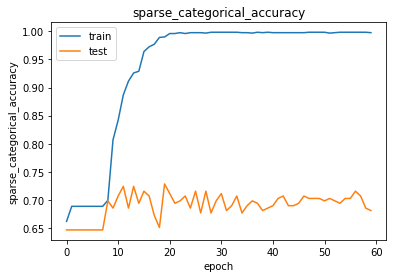

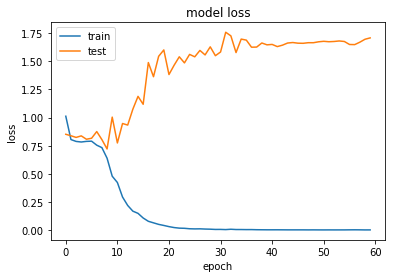

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
results = bdam.results_
# summarize history for intersestion over union
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('sparse_categorical_accuracy')
plt.ylabel('sparse_categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
y_test_pred, attw = bdam.predictWithAttention(X_test)
np.sum(y_test_pred==np.array(y_test))/len(X_test)

Maximum sentence length: 47. Maximum number of chars in a word: 16


C:\Users\Douglas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7151162790697675

In [32]:
idpred=17

preços justos e porções bem servidas , souvlaki de frango aprovado !
pred:1.0, true:1.0


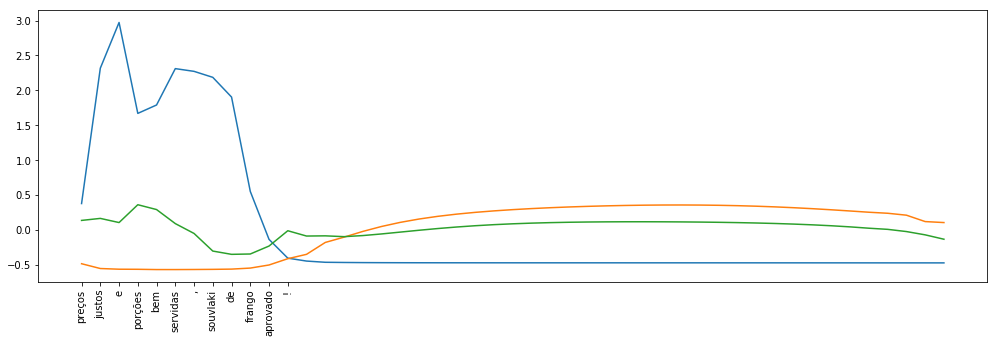

In [33]:
idpred+=1
print(X_test[idpred])
print('pred:{}, true:{}'.format(y_test_pred[idpred], y_test[idpred]))

words = X_test[idpred].split(' ')
ticks = [i for i in range(len(words))]

plt.figure(figsize=(17,5))
plt.xticks(ticks, words, rotation='vertical')
for k in range(attw.shape[1]):
    plt.plot(attw[idpred,k])

# Randomized Search

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
rnnArgs = { 
            'nClasses' : [3],
            'preTrainedEmbeddings' : [wee],
            'dictSize' : [500, 1000, 2000, 4000],
            'nHeads' : [1,3,9],
            'charEmbSize' : [4, 8, 16, 32],
            'wordEmbSize' : [8, 16, 32, 64, 128],
            'nFiltersNGram' : [4, 8, 16],
            'nFiltersWordGram' : [4, 8, 16],
            'charfilterSize' : [4,  8, 16],
            'wordfilterSize' : [4, 8, 16],
          }    

rsRNN = RandomizedSearchCV(bdam, rnnArgs, verbose = 1, n_iter=10, return_train_score=True)

In [40]:
rsRNN.fit(X_train, y_train)

In [ ]:
import pandas as pd
pd.DataFrame(rsRNN.cv_results_ )

In [ ]:
np.sum(rsRNN.best_estimator_.predict(X_test)==np.array(y_test))/len(X_test)